In [13]:
from keras.models import load_model
from pickle import load, dump
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [14]:
model = load_model('D:\Aravind\Matlab tutorial\SIH\classification\complete_disease\disease_model\model_14.h5')

In [15]:
#load c2d features
features=load(open('resnet152_features.pkl','rb'))
print('Image_features: train=%d' % len(features))

labels = load(open('disease_label.pkl', 'rb'))

class_map={'Apple___Apple_scab':0,'Apple___Black_rot':1,'Apple___Cedar_apple_rust':2,
           'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot':3,'Corn_(maize)___Common_rust_':4,'Corn_(maize)___Northern_Leaf_Blight':5,
          'Grape___Black_rot':6,'Grape___Esca_(Black_Measles)':7,'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':8,
          'Potato___Early_blight':9,'Potato___healthy':10,'Potato___Late_blight':11,
          'Tomato___Bacterial_spot':12,'Tomato___Early_blight':13,'Tomato___Septoria_leaf_spot':14,'Tomato___Tomato_Yellow_Leaf_Curl_Virus':15}
reverse_class_map=dict()
for i in class_map:
    reverse_class_map[class_map[i]]=i
print(reverse_class_map)

Image_features: train=13657
{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 4: 'Corn_(maize)___Common_rust_', 5: 'Corn_(maize)___Northern_Leaf_Blight', 6: 'Grape___Black_rot', 7: 'Grape___Esca_(Black_Measles)', 8: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 9: 'Potato___Early_blight', 10: 'Potato___healthy', 11: 'Potato___Late_blight', 12: 'Tomato___Bacterial_spot', 13: 'Tomato___Early_blight', 14: 'Tomato___Septoria_leaf_spot', 15: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}


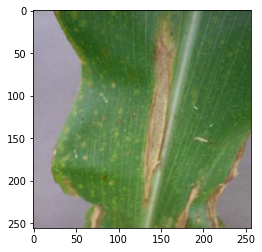

[[5.5277183e-06 2.4511637e-03 1.6602658e-07 1.3371259e-01 1.5055420e-01
  7.1299613e-01 2.2808212e-08 2.2777719e-04 8.8238500e-11 2.4585836e-09
  5.4152355e-07 1.5346482e-06 2.2867204e-07 2.3084366e-09 4.9893388e-05
  2.3251246e-07]]


In [16]:
image_name='f7cf0608-2278-4a38-a37e-1356bd359651___RS_NLB 3490.JPG'
image_id='f7cf0608-2278-4a38-a37e-1356bd359651___RS_NLB 3490'
image=mpimg.imread(image_name)
plt.imshow(image,cmap='gray',interpolation='bicubic')
plt.show()
x_n=np.array(features[image_id])
gt_label=np.array(labels[image_id])
preds=model.predict([x_n])
print(preds)

In [17]:
predicted_class_id=np.argmax(preds[0])
print(predicted_class_id)
gt_class_id=np.argmax(gt_label)
print('predicted disease')
print(reverse_class_map[predicted_class_id])
print('ground truth disease')
print(reverse_class_map[gt_class_id])

5
predicted disease
Corn_(maize)___Northern_Leaf_Blight
ground truth disease
Corn_(maize)___Northern_Leaf_Blight


In [ ]:
from tkinter import filedialog
from tkinter import *
 
root = Tk()
root.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("jpeg files","*.jpg"),("all files","*.*")))
print (root.filename)
image_id=root.filename.split('/')[-1]
image_id=image_id.split('.')[0]
print(image_id)
image=mpimg.imread(root.filename)
x_n=np.array(features[image_id])
gt_label=np.array(labels[image_id])
preds=model.predict([x_n])
predicted_class_id=np.argmax(preds[0])
print(predicted_class_id)
gt_class_id=np.argmax(gt_label)
print('predicted disease')
print(reverse_class_map[predicted_class_id])
print('ground truth disease')
print(reverse_class_map[gt_class_id])
if predicted_class_id==0:
    # Load an image using OpenCV
    cv_img = cv2.imread("Apple_scab.png")
    fname=('Apple_scab.png')
elif predicted_class_id==1:
    cv_img = cv2.imread("Black_rot.png")
    fname=('Black_rot.png')
elif predicted_class_id==2:
    cv_img = cv2.imread("Cedar_apple_rust.png")
    fname=('Cedar_apple_rust.png')
elif predicted_class_id==3:
    cv_img = cv2.imread("Cercospora_leaf_spot.png") 
    fname=('Cercospora_leaf_spot.png')
elif predicted_class_id==4:
    cv_img = cv2.imread("Common_rust.png")  
    fname=('Common_rust.png')
elif predicted_class_id==5:
    cv_img = cv2.imread("Northern_Leaf_Blight.png")
    fname=('Northern_Leaf_Blight.png')
elif predicted_class_id==6:
    cv_img = cv2.imread("Black_rot_greapes.png")  
    fname=('Black_rot_greapes.png')
elif predicted_class_id==7:
    cv_img = cv2.imread("Esca_Phaeomoniella_aleophilum1.png")  
    fname=('Esca_Phaeomoniella_aleophilum1.png')
elif predicted_class_id==8:
    cv_img = cv2.imread("Leaf_blight.png")  
    fname=('Leaf_blight.png')
elif predicted_class_id==9:
    cv_img = cv2.imread("Potato1.png")  
    fname=('Potato1.png')
elif predicted_class_id==10:
    cv_img = cv2.imread("Potato2.png") 
    fname=('Potato2.png')
elif predicted_class_id==11:
    cv_img = cv2.imread("Potato3.png")  
    fname=('Potato3.png')
elif predicted_class_id==12:
    cv_img = cv2.imread("Tomato1.png")
    fname=('Tomato1.png')
elif predicted_class_id==13:
    cv_img = cv2.imread("tomato2.png") 
    fname=('tomato2.png')
elif predicted_class_id==14:
    cv_img = cv2.imread("Tomato 3.png")  
    fname=('Tomato 3.png')
elif predicted_class_id==15:
    cv_img = cv2.imread("Tomato4.png")
    fname=('Tomato4.png')
# Get the image dimensions (OpenCV stores image data as NumPy ndarray)
height, width, no_channels = cv_img.shape
canvas = Canvas(root, width = width, height = height)      
canvas.pack()      
img = PhotoImage(file=fname)      
canvas.create_image(40,40, anchor=NW, image=img)     
mainloop()

C:/Users/Hema/Desktop/testing samples/Corn_test/1/ba32d51c-9800-4110-ad8e-df2ab422a93e___RS_GLSp 4693.JPG
ba32d51c-9800-4110-ad8e-df2ab422a93e___RS_GLSp 4693
5
predicted disease
Corn_(maize)___Northern_Leaf_Blight
ground truth disease
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
